## Test

In [1]:
from dcapy.schedule import Well, WellsGroup, Period, Scenario
from dcapy import dca
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
time_drill = np.arange(0,6,3)
list_wells = []
for i,v in enumerate(time_drill):

  p = Period(
      name='base',
      dca = dca.Arps(
        qi = 1000,
        di = 0.35,
        ti = v,
        b=0,
        freq_di = 'A'
      ),
      start = 0,
      end=120,
      freq_output='M',
      freq_input='M'
  )

  w = Well(
        name = f'well_{i+1}',
        scenarios = [
          Scenario(name='sc', periods = [p])
        ]
    )
  list_wells.append(w)


gw = WellsGroup(name='channel_wells',wells=list_wells)
gw.tree()

🏭channel_wells                                                                              
┣━━ 🗼well_1                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┗━━ 🗼well_2                                                                                 
    ┗━━ 🔀sc                                                                                 
        ┗━━ 📉base                                                                           

In [3]:
gw.generate_forecast(freq_output='M')

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,period,scenario,well
date,,,,,,,
0,1000.000000,0.000000,0,29566.722637,base,sc,well_1
1,971.254575,29566.722637,0,29141.768636,base,sc,well_1
2,943.335450,58283.537273,0,28304.076118,base,sc,well_1
3,916.218872,86174.874873,0,27490.463427,base,sc,well_1
4,889.881771,113264.464127,0,26700.238378,base,sc,well_1
...,...,...,...,...,...,...,...
115,38.133327,989348.578409,0,1144.162002,base,sc,well_2
116,37.037168,990476.055898,0,1111.272580,base,sc,well_2
117,35.972519,991571.123568,0,1079.328577,base,sc,well_2


/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


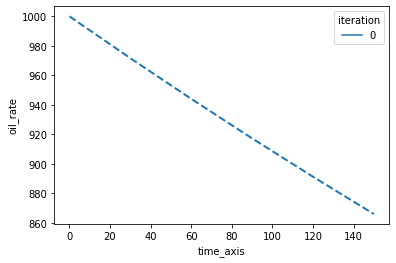

In [4]:
dca.Arps(
        qi = 1000,
        di = 0.35,
        ti = 0,
        b=0,
        freq_di = 'A'
).plot(start=0, end=160, freq_input='D',freq_output='M')

In [5]:
dca.Arps(
        qi = 1000,
        di = 0.35,
        ti = 0,
        b=0,
        freq_di = 'A'
).forecast(start=0, end=160, freq_input='D',freq_output='M')

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume
date,,,,
0,1000.000000,0.000000,0,29572.601300
30,971.642711,29572.601300,0,29153.301901
60,944.089558,58306.603801,0,28326.593296
90,917.317738,86225.787892,0,27523.327906
120,891.305094,113353.259613,0,26742.840944
150,866.030097,139711.469780,0,26358.210168


In [28]:
well_delay = 3
n_wells=21
time_drill = np.arange(0,well_delay*n_wells,well_delay)
list_wells = []
qi = np.array([400,700,1000])

drill_cost = -7000000
opex = -20
abandon = -500000
oil_price = 50

for i,v in enumerate(time_drill):
  decay_rate = 0.9
  qi_decay = qi*np.power(decay_rate,i)
  p = Period(
      name='base',
      dca = dca.Arps(
        qi = qi_decay.tolist(),
        di = 0.4,
        ti = v,
        b=0,
        freq_di = 'A'
      ),
      start = 0,
      end=120,
      freq_output='M',
      freq_input='M',
      cashflow_params = [
        {
            'name':'drill',
            'value':drill_cost,
            'periods':1,
            'target':'capex'
        },
        {
            'name':'Opex',
            'value':opex,
            'multiply': 'oil_volume',
            'target':'opex'
        },
        {
            'name':'Income',
            'value':oil_price,
            'multiply': 'oil_volume',
            'target':'income',
            'wi':0.92
        },

      ]
  )

  w = Well(
        name = f'well_{i+1}',
        scenarios = [
          Scenario(name='sc', periods = [p])
        ]
    )
  list_wells.append(w)


gw = WellsGroup(name='channel_wells',wells=list_wells)
gw.tree()

🏭channel_wells                                                                              
┣━━ 🗼well_1                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_2                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_3                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_4                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_5                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_6                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_7                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_8                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_9                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_10                                                                                
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_11                                                                                
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_12                                                                                
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_13                                                                                
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣━━ 🗼well_14                                                                                
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┣

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountere

        oil_rate       oil_cum  iteration    oil_volume period scenario  \
date                                                                      
0     400.000000      0.000000          0  11802.203826   base       sc   
1     386.886440  11802.203826          0  11608.742694   base       sc   
2     374.202794  23217.485389          0  11228.162840   base       sc   
3     361.934967  34258.529507          0  10860.059878   base       sc   
4     350.069328  44937.605145          0  10504.024766   base       sc   
5     338.592690  55266.579039          0  10159.661874   base       sc   
6     327.492301  65256.928892          0   9826.588540   base       sc   
7     316.755827  74919.756119          0   9504.434648   base       sc   
8     306.371335  84265.798189          0   9192.842218   base       sc   
9     296.327288  93305.440555          0   8891.465002   base       sc   

        well  
date          
0     well_1  
1     well_1  
2     well_1  
3     well_1  
4     wel

<AxesSubplot:xlabel='date', ylabel='oil_cum'>

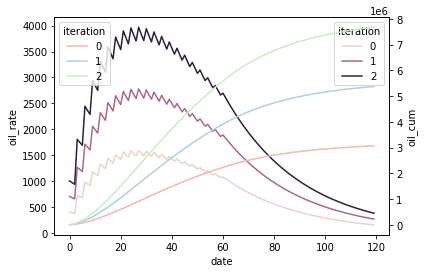

In [29]:
f = gw.generate_forecast(freq_output='M')
print(f.head(10))
total_prod = f.reset_index().groupby(['date','iteration'])['oil_rate','oil_cum'].sum().reset_index()
fig, ax = plt.subplots()

sns.lineplot(data=total_prod, x='date', y='oil_rate', hue='iteration',ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=total_prod, x='date', y='oil_cum', hue='iteration',ax=ax2, palette='Pastel1')

In [30]:
c = gw.generate_cashflow(freq_output='M')

In [31]:
c[0].capex[1].get_cashflow()

3.0   -7000000.0
dtype: float64

/home/scuervo91/dev/apps/dcapy/dcapy/cashflow/cashflow.py:355: UserWarning: FixedFormatter should only be used together with FixedLocator
  grax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks])
/home/scuervo91/dev/apps/dcapy/dcapy/cashflow/cashflow.py:363: UserWarning: FixedFormatter should only be used together with FixedLocator
  spax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks_cum])


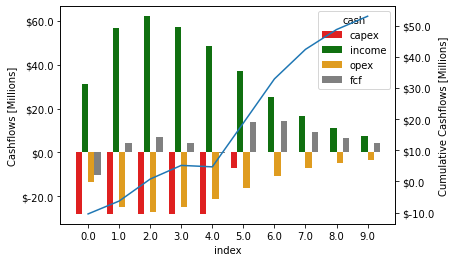

In [34]:
c[2].plot(freq_output='A',cum=True,format='m')

In [37]:
gw.npv(0.0,freq_cashflow='M')

,npv,iteration
0.0,-6.695810e+07,0
0.0,-6.926680e+06,1
0.0,5.310474e+07,2
